# Model 1: 
Fitting SR Matrix plus transitional matrix with added weights by question type

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tesser import cython_sr
from tesser import cython_fit
from tesser import util
import importlib

In [6]:
data_dir= "/mnt/c/Users/rodv2/Dropbox/tesser_successor/Data"
tdir = "/home/work-machine/Preston_Lab/tesser_successor/Data"

In [7]:
induct_all = util.load_induct(data_dir)
struct_all = util.load_struct(data_dir)
n_states = 21
subj_list = util.subj_list()

In [4]:
induct_all.QuestType.unique()

array(['Prim', 'Bound2', 'Bound1'], dtype=object)

In [9]:
transition_all = cython_sr.transition_multiple(subj_list, tdir+"/Transitional_Matrices")

In [10]:
transition_all.keys()

dict_keys([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138])

# True transitional matrix

In [11]:
tranmodel = transition_all

In [8]:
# tranmodel=[tranmodzel

In [9]:
# subj_filter = f'SubjNum == {100}'
# induct_all = induct_all.query(subj_filter)
# struct_all = struct_all.query(subj_filter)

In [10]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau', 'w_prim' ,'w_bound1', 'w_bound2']
var_bounds = {'gamma': [0, 1], 'alpha': [0, 1], 'tau': [0, 10],
              'w_prim' : [0, 1], 'w_bound1' : [0, 1], 'w_bound2' : [0, 1]}
results = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds, split =True,
                               n_states=n_states, verbose=False, model_type='true transitional', model=tranmodel, split_list =["w"])

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating

In [11]:
# results=pd.read_csv('./Data/results/transition.csv')
results=results.set_index('subject')
results.head()

,gamma,alpha,tau,w_prim,w_bound1,w_bound2,log_like
subject,,,,,,,
100,1.000000,0.999809,1.902522,0.046755,0.295833,1.0,-25.695217
101,0.991330,0.685950,0.887793,1.000000,0.865258,0.0,-24.957704
102,1.000000,0.010038,0.078665,0.000000,1.000000,1.0,-20.016657
103,0.086622,0.874221,0.052817,1.000000,0.175509,1.0,-23.782208
104,0.000000,0.998248,0.253155,1.000000,0.198137,0.0,-26.467661


In [21]:
importlib.reload(cython_fit)

<module 'tesser.cython_fit' from '/home/work-machine/Preston_Lab/tesser_successor/tesser/cython_fit.py'>

array([[<AxesSubplot:title={'center':'gamma'}>,
        <AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'tau'}>],
       [<AxesSubplot:title={'center':'w_prim'}>,
        <AxesSubplot:title={'center':'w_bound1'}>,
        <AxesSubplot:title={'center':'w_bound2'}>],
       [<AxesSubplot:title={'center':'log_like'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

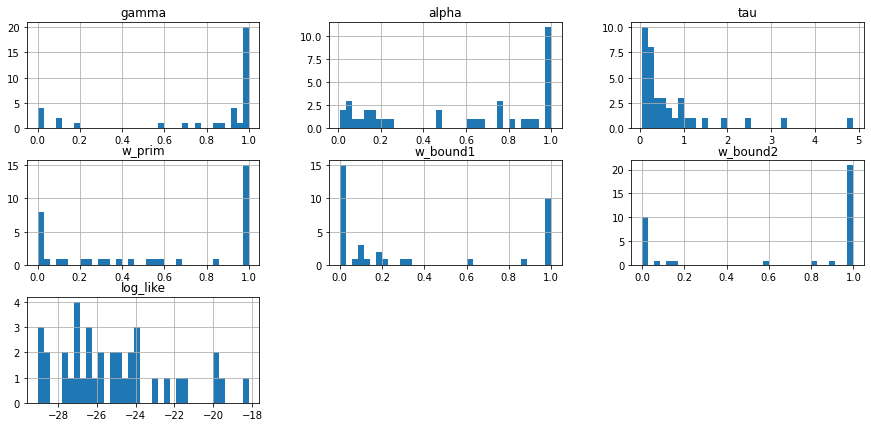

In [27]:
# cython_fit.plot_by_question(struct_all, induct_all, results, split =True, n_states=21, model_type= 'true transitional', model =tranmodel, fig_name='Transitional matrix by question'),
results.hist(bins=35,figsize= (15,7))

In [28]:
results.to_csv("./Data/results/transition.csv")

In [12]:
fixed = {'tau': results.tau.mean()}
var_names = ['gamma', 'alpha', 'w_prim' ,'w_bound1', 'w_bound2']
var_bounds = {'gamma': [0, 1], 'alpha': [0, 1],
              'w_prim' : [0, 1], 'w_bound1' : [0, 1], 'w_bound2' : [0, 1]}
results_2 = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds, split =True,
                               n_states=n_states, verbose=False, model_type='true transitional', model=tranmodel, split_list =["w"])

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating

In [13]:
results_2=results_2.set_index('subject')
results_2.head()

,tau,gamma,alpha,w_prim,w_bound1,w_bound2,log_like
subject,,,,,,,
100,0.729846,0.167566,0.000000,1.000000,1.000000,1.0,-29.112182
101,0.729846,0.989554,0.658779,0.986192,0.808101,0.0,-25.000805
102,0.729846,1.000000,0.068039,1.000000,0.000000,1.0,-24.352823
103,0.729846,0.934946,0.781754,1.000000,0.161748,0.0,-25.259952
104,0.729846,0.000000,1.000000,1.000000,0.594631,0.0,-27.107499


(array([[<AxesSubplot:title={'center':'gamma'}>,
         <AxesSubplot:title={'center':'alpha'}>,
         <AxesSubplot:title={'center':'tau'}>],
        [<AxesSubplot:title={'center':'w_prim'}>,
         <AxesSubplot:title={'center':'w_bound1'}>,
         <AxesSubplot:title={'center':'w_bound2'}>],
        [<AxesSubplot:title={'center':'log_like'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object),
 array([[<AxesSubplot:title={'center':'tau'}>,
         <AxesSubplot:title={'center':'gamma'}>,
         <AxesSubplot:title={'center':'alpha'}>],
        [<AxesSubplot:title={'center':'w_prim'}>,
         <AxesSubplot:title={'center':'w_bound1'}>,
         <AxesSubplot:title={'center':'w_bound2'}>],
        [<AxesSubplot:title={'center':'log_like'}>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

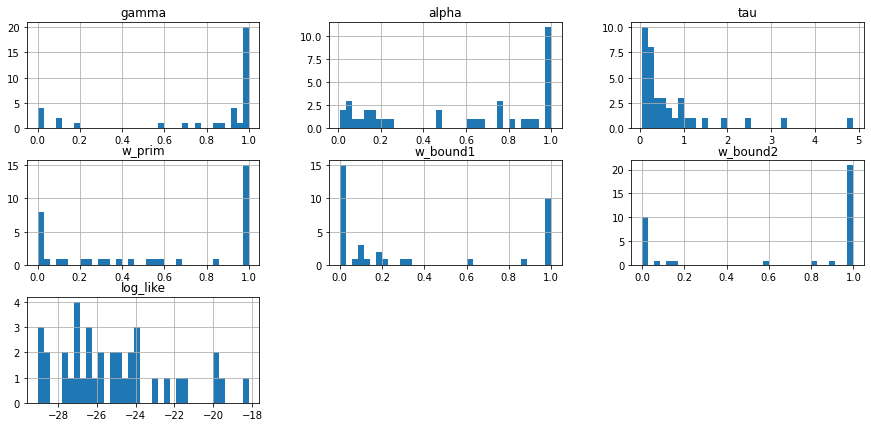

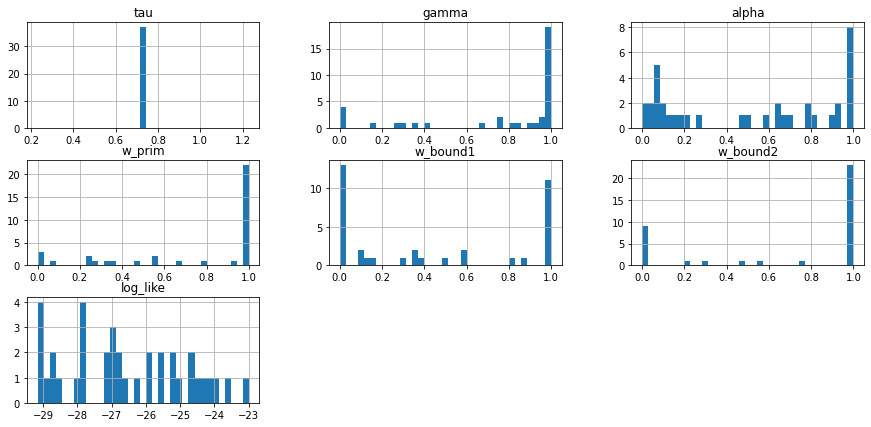

In [14]:
# cythonz_fit.plot_by_question(struct_all, induct_all, results, split =True, n_states=21, model_type= 'true transitional', model =tranmodel, fig_name='Transitional matrix by question'),
results.hist(bins=35, figsize =(15,7)), results_2.hist(bins=35,figsize= (15,7))

In [22]:
len(induct_all.TrialNum)

1554